# **Housing Dataset Analysis**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [4]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("RdBu")

In [5]:
housing = pd.read_csv("../data/processed/housing_ingest.csv")


In [6]:
housing.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [7]:
housing['Price_per_SQFT'] = housing['House_Price'] / housing['Square_Footage']
housing["House_Age"] = 2025-housing["Year_Built"]

**House Price Distribution**

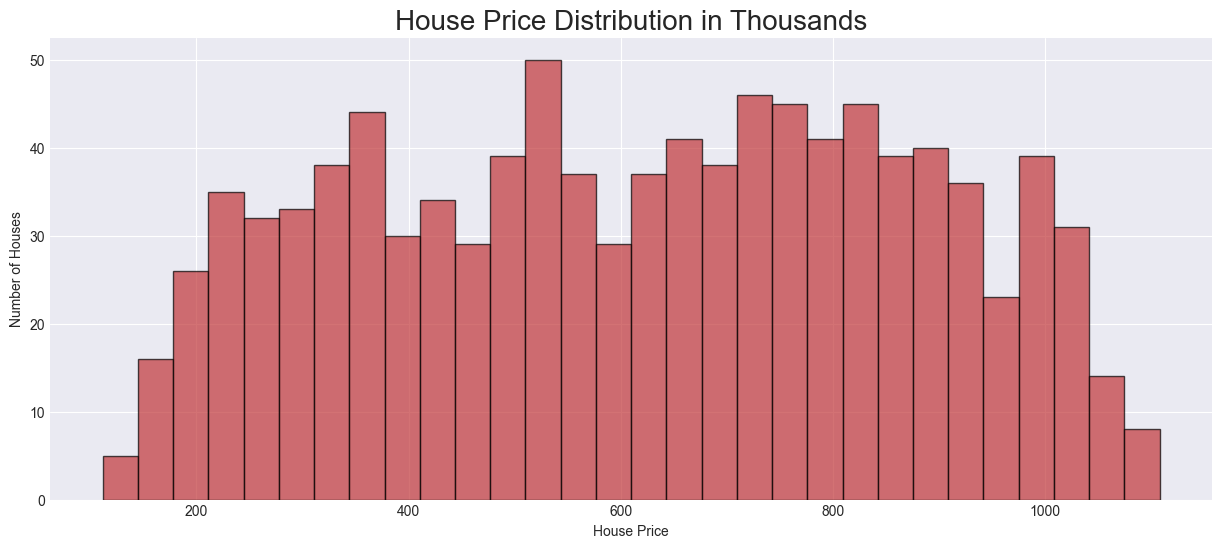

In [8]:
plt.figure(figsize=(15,6))
plt.hist((housing['House_Price']/1000), bins=30, edgecolor='black', alpha=0.7)
plt.title('House Price Distribution in Thousands' ,fontsize=20)
plt.xlabel('House Price')
plt.ylabel('Number of Houses')
plt.show()

**How House Size Affects It Is Price**

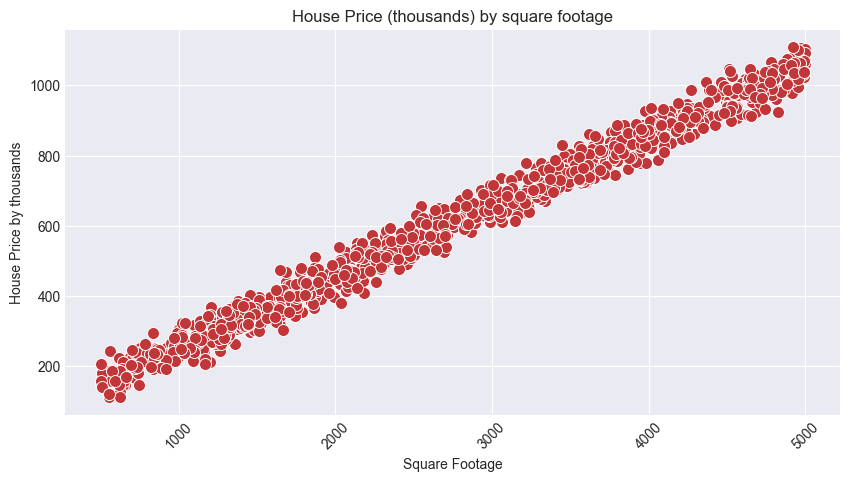

In [9]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=housing["Square_Footage"],y=(housing["House_Price"]/1000),s=75)
plt.xlabel("Square Footage")
plt.ylabel("House Price by thousands")
plt.title("House Price (thousands) by square footage")
plt.xticks(rotation=45)
plt.show()

**IT Appeers That House Price IS Perfectly Increases as it is size Increas**

**What Is Distrubiution of houses number of bedrooms and number of bathrooms**

([0, 1, 2], [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

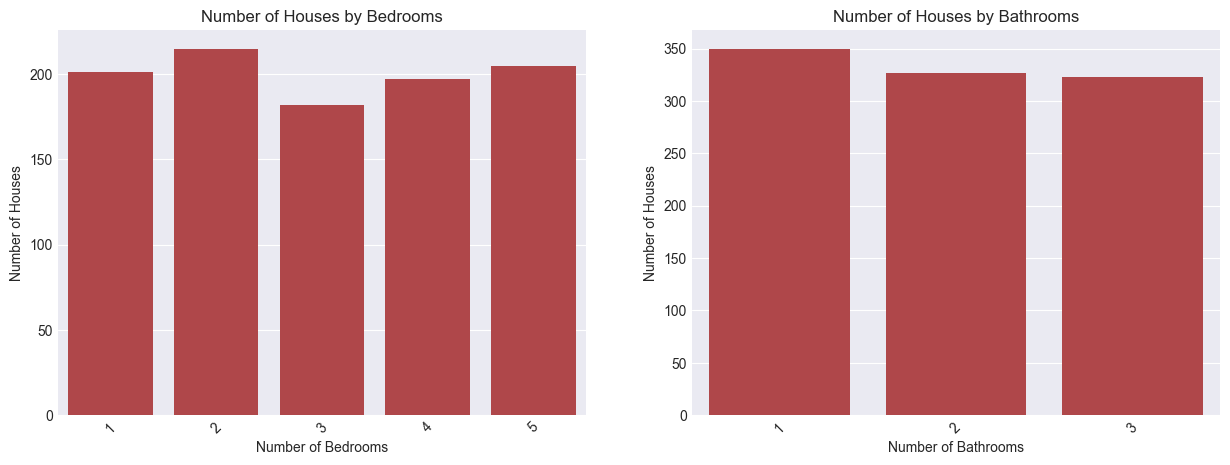

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(housing,x="Num_Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Bedrooms")
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(housing,x="Num_Bathrooms" )
plt.xlabel("Number of Bathrooms")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Bathrooms")
plt.xticks(rotation=45)

**Number of Houses really close to each other as number of bedrooms and bathrooms are ranging from 180-225 , 320-350 respectivly**

**How Number of Bedrooms or number of Bathrooms Affects Price**

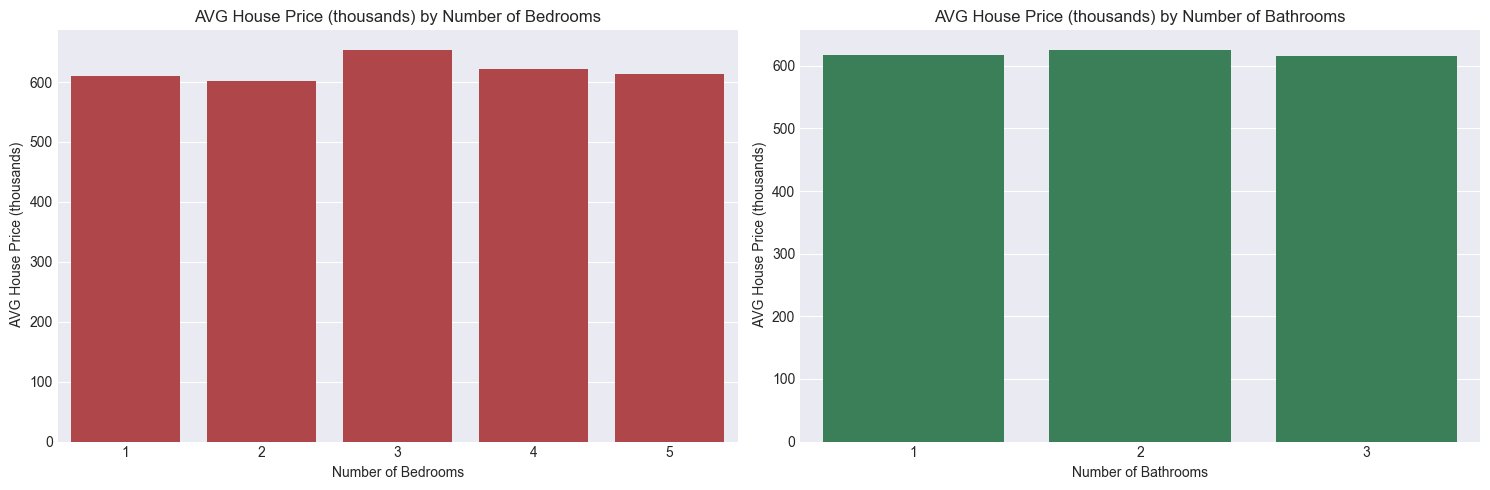

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(121)
avg_price_bed = (housing.groupby("Num_Bedrooms")["House_Price"].mean()/1000).round(2)
sns.barplot(y=avg_price_bed.values,x=avg_price_bed.index)
plt.xlabel("Number of Bedrooms")
plt.ylabel(" AVG House Price (thousands)")
plt.title("AVG House Price (thousands) by Number of Bedrooms")

plt.subplot(122)
avg_price_bed = (housing.groupby("Num_Bathrooms")["House_Price"].mean()/1000).round(2)
sns.barplot(y=avg_price_bed.values,x=avg_price_bed.index,color="#2E8B57")
plt.xlabel("Number of Bathrooms")
plt.ylabel(" AVG House Price (thousands)")
plt.title("AVG House Price (thousands) by Number of Bathrooms")
plt.tight_layout()
plt.show()

**Avg Price of Houses really close to each other as number of bedrooms, with houses with 3 bedrooms comes first with highest avg price by 50K ahead of second avg , in terms of avg house price by number of bathrooms it is almost identical**

**What is the Houses Quality?**

In [12]:
housing["House_Score"] = (
    0.35*(housing["Square_Footage"] - housing["Square_Footage"].min()) / (housing["Square_Footage"].max() - housing["Square_Footage"].min()) +
    0.20*(housing["Neighborhood_Quality"] - housing["Neighborhood_Quality"].min()) / (housing["Neighborhood_Quality"].max() - housing["Neighborhood_Quality"].min()) +
    0.10*(housing["Lot_Size"] - housing["Lot_Size"].min()) / (housing["Lot_Size"].max() - housing["Lot_Size"].min()) +
    0.10*(housing["Year_Built"] - housing["Year_Built"].min()) / (housing["Year_Built"].max() - housing["Year_Built"].min()) +
    0.15*((housing['Num_Bedrooms'] + housing['Num_Bathrooms']) / 8) +
    0.10*(housing["Garage_Size"] - housing["Garage_Size"].min()) / (housing["Garage_Size"].max() - housing["Garage_Size"].min())
)


In [13]:
housing['House_Category'] = pd.qcut(housing['House_Score'],
                               q=4,
                               labels=['Low', 'Medium', 'Good', 'Excellent'])


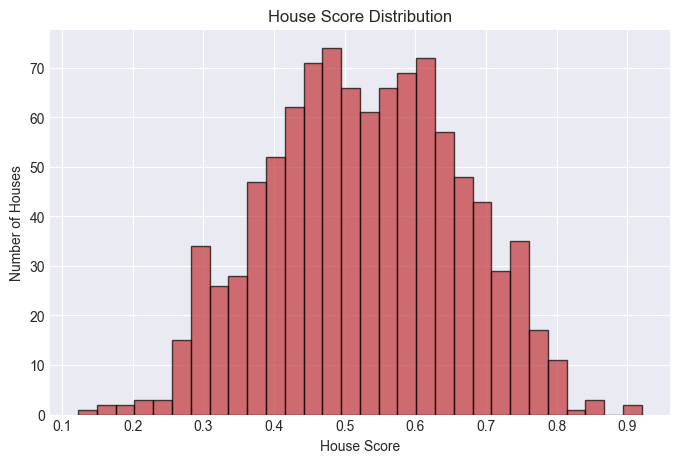

In [14]:
plt.figure(figsize=(8,5))
plt.hist(housing['House_Score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('House Score Distribution')
plt.xlabel('House Score')
plt.ylabel('Number of Houses')
plt.show()

**It appers that most of houses based on it is house score ranges from 0.4 to 0.7**  

**What is the Average Price For House Based on House Quality**

C:\Users\moust\AppData\Local\Temp\ipykernel_24044\82515040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_house_score = housing.groupby('House_Category')['House_Price'].mean().sort_index()


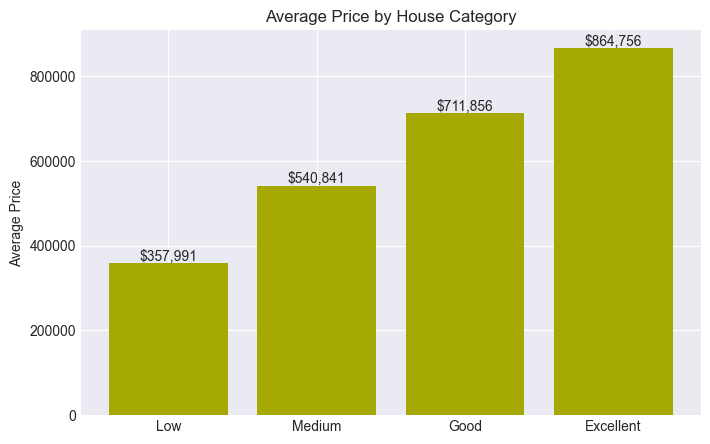

In [15]:
avg_house_score = housing.groupby('House_Category')['House_Price'].mean().sort_index()

plt.figure(figsize=(8,5))
plt.bar(avg_house_score.index, avg_house_score.values, color="#a6a804")
plt.title('Average Price by House Category')
plt.ylabel('Average Price')
for i, v in enumerate(avg_house_score.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.show()

**Houses with quality EXcellent comes first by far as expected**

**How House Age Affects It Is Price**

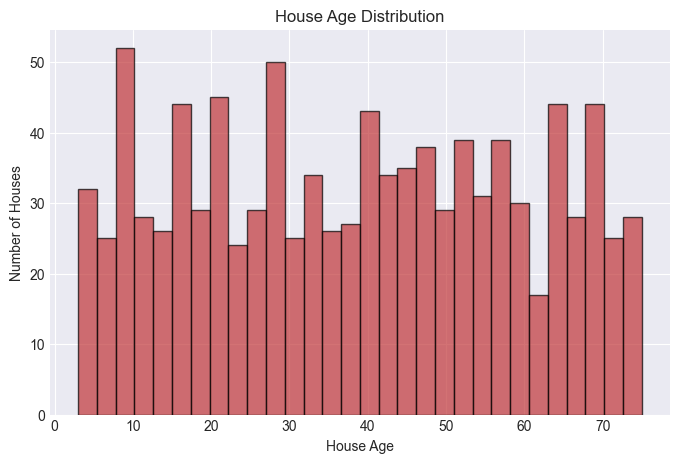

In [16]:
plt.figure(figsize=(8,5))
plt.hist(housing['House_Age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('House Age Distribution')
plt.xlabel('House Age')
plt.ylabel('Number of Houses')
plt.show()

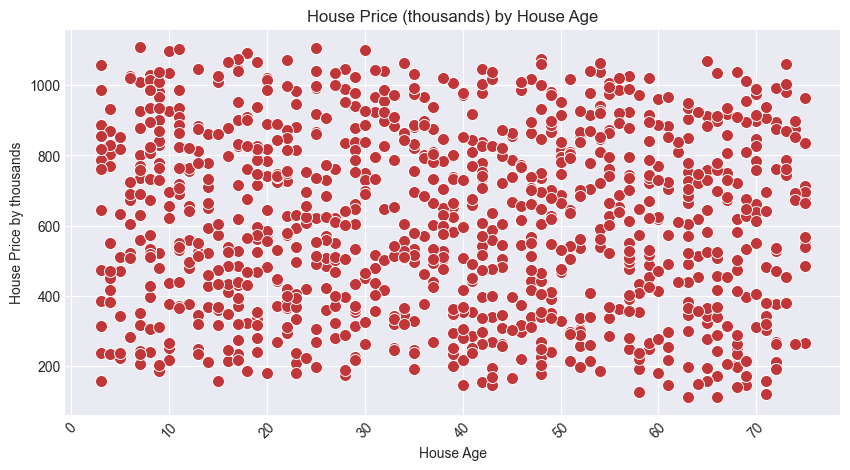

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=housing["House_Age"],y=(housing["House_Price"]/1000),s=75)
plt.xlabel("House Age")
plt.ylabel("House Price by thousands")
plt.title("House Price (thousands) by House Age")
plt.xticks(rotation=45)
plt.show()

**It appers that we have similar number of houses accoss all ages , with no observable affect of house age on house Price**

**we saw that Age dosen't have affect on house price , so beside age How House Neighborhood Quality Affects It Is Price**

In [18]:

age_threshold = 25
housing['Age_Group'] = housing['House_Age'].apply(lambda x: 'Old (>25 yrs)' if x > age_threshold else 'New (<=25 yrs)')

avg_age_quality = housing.groupby(['Neighborhood_Quality', 'Age_Group'])['Price_per_SQFT'].mean().reset_index()

avg_age_quality['Percentage'] = avg_age_quality.groupby('Neighborhood_Quality')['Price_per_SQFT'].transform(lambda x: 100 * x / x.sum())

fig = px.bar(
    avg_age_quality,
    x='Neighborhood_Quality',
    y='Price_per_SQFT',
    color='Age_Group',
    barmode='group',
    text=avg_age_quality['Percentage'].apply(lambda x: f'{x:.1f}%'),
    labels={'Price_per_SQFT':'Average Price per SQFT', 'Neighborhood_Quality':'Neighborhood Quality'},
    title='House SQFT price by Age and Neighborhood Quality ',
     color_discrete_map={
        'Old (>25 yrs)': '#FF9933',  
        'New (<=25 yrs)': '#008080'  
    }
)

fig.update_traces(textposition='outside', hovertemplate='<b>Neighborhood:</b> %{x}<br><b>Price per SQFT:</b> $%{y:.2f}<br><b>Percentage:</b> %{text}')
fig.update_layout(yaxis=dict(title='Average Price per SQFT'), xaxis=dict(title='Neighborhood Quality'), legend_title='Age Group')

fig.show()


**we see That Old Houses has lower price acrros all  Neighborhood Qualites compared to New Houses**